## Question 2

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### (a)

(900, 604, 3)


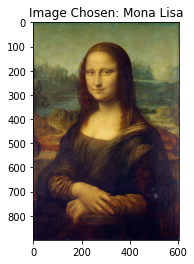

In [2]:
image = plt.imread('monalisa.jpg')
plt.imshow(image);
plt.title("Image Chosen: Mona Lisa");
print(image.shape)

### (b) Preprocessing the input

In [3]:
#Additional preprocessing step: nomalization of rgb values
def preprocess(data):
    chosen = set()
    pixel_num = data.shape[0] * data.shape[1]
    x = []
    y = []
    
    for i in range(5000):#Generate coordiantes
        index = int(random.random()*pixel_num)
        while (index in chosen):
            index = int(random.random()*pixel_num)
        chosen.add(index)
        
    for i in chosen:
        w = i//data.shape[1]
        h = i%data.shape[1]
        
        x.append([w,h])
        y.append(data[w][h]/255.0)#Normalizes RGB to 0 and 1
        
    coordinate = np.array(x)
    rgb = np.array(y)
    return coordinate, rgb

train_X, train_Y = preprocess(image)

### (c) Preprocessing the output

In [4]:
#I choose method 3, one function for each channel
def preprocess_label(data):
    r = []
    g = []
    b = []
    
    for i in range(len(data)):
        r.append(data[i][0])
        g.append(data[i][1])
        b.append(data[i][2])
        
    return np.array(r), np.array(g), np.array(b)

r,g,b = preprocess_label(train_Y)

### (d)

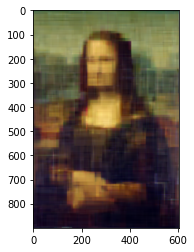

In [5]:
#I used Random Forrest from sklearn library
def createRF(tree_num=100, depth=None):
    model = RandomForestRegressor(n_estimators = tree_num, max_depth= depth)
    return model

f_r = createRF()
f_g = createRF()
f_b = createRF()

f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)

def show(models,data,train_X,train_Y):
    coordinates = []
    p = train_X.tolist()
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            tmp = [i,j]
            if tmp in p:
                continue
            coordinates.append([i,j])
                
    r = models[0].predict(coordinates)
    g = models[1].predict(coordinates)
    b = models[2].predict(coordinates)
    
    pic = []
    
    for i in range(data.shape[0]):
        pic.append([0]*data.shape[1])
    
    for i in range(len(coordinates)):
        w = coordinates[i][0]
        h = coordinates[i][1]
        pic[w][h]=[int(r[i]*255),int(g[i]*255),int(b[i]*255)]
#         print(pic[w][h])
    
    for i in range(len(train_X)):
        w = train_X[i][0]
        h = train_X[i][1]
        pic[w][h] = [int(train_Y[i][0]*255),int(train_Y[i][1]*255),int(train_Y[i][2]*255)]
#         print(pic[w][h])
        
    pic = np.array(pic)
    
    fig = plt.figure()
    plt.imshow(pic)
    plt.show()

show([f_r,f_g,f_b],image,train_X,train_Y)

### (e) Experimentation

#### (i)

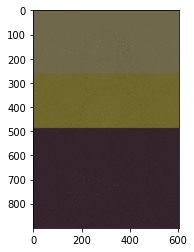

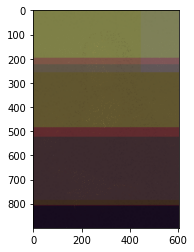

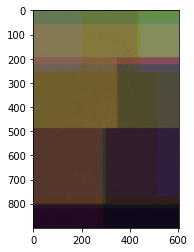

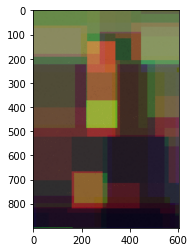

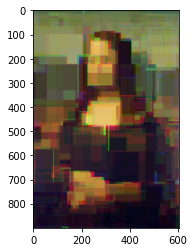

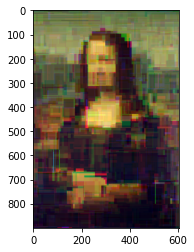

In [6]:
f_r = createRF(1,1)
f_g = createRF(1,1)
f_b = createRF(1,1)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(1,2)
f_g = createRF(1,2)
f_b = createRF(1,2)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(1,3)
f_g = createRF(1,3)
f_b = createRF(1,3)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(1,5)
f_g = createRF(1,5)
f_b = createRF(1,5)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(1,10)
f_g = createRF(1,10)
f_b = createRF(1,10)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(1,15)
f_g = createRF(1,15)
f_b = createRF(1,15)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)


#### (ii)

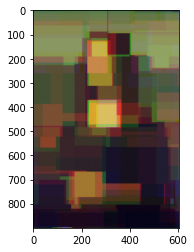

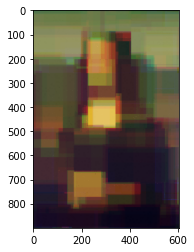

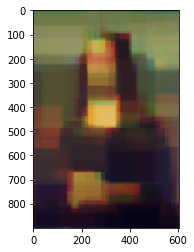

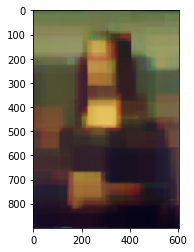

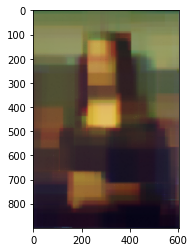

In [7]:
f_r = createRF(1,7)
f_g = createRF(1,7)
f_b = createRF(1,7)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(3,7)
f_g = createRF(3,7)
f_b = createRF(3,7)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(5,7)
f_g = createRF(5,7)
f_b = createRF(5,7)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(10,7)
f_g = createRF(10,7)
f_b = createRF(10,7)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

f_r = createRF(100,7)
f_g = createRF(100,7)
f_b = createRF(100,7)
f_r.fit(train_X,r)
f_g.fit(train_X,g)
f_b.fit(train_X,b)
show([f_r,f_g,f_b],image,train_X,train_Y)

#### (iii)

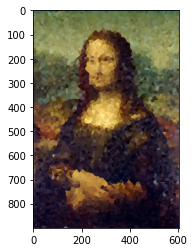

In [8]:
f_r = KNeighborsRegressor(n_neighbors = 1)
f_g = KNeighborsRegressor(n_neighbors = 1)
f_b = KNeighborsRegressor(n_neighbors = 1)
f_r.fit(train_X, r)
f_g.fit(train_X, g)
f_b.fit(train_X, b)
show([f_r,f_g,f_b],image,train_X,train_Y)

#### (iv)


In [17]:
def pruning(num_Tree, num_Depth):
    max_score = 0
    for depth in range(1,num_Depth):
        for tree in range(1,num_Tree):
            f_r = createRF(tree,depth)
            f_g = createRF(tree,depth)
            f_b = createRF(tree,depth)
            f_r.fit(train_X,r)
            f_g.fit(train_X,g)
            f_b.fit(train_X,b)

            score = (f_r.score(train_X,r) + f_g.score(train_X,g) + f_b.score(train_X,b))/3
            if score > max_score*1.01: 
                max_score = score
                param = [tree,depth]
                
    return param

param = pruning(30,30)
num_Tree = param[0]
num_Depth = param[1]
print("The optimum parameters for the random forest model are " + str(num_Tree) + " trees with a depth of " + str(num_Depth) + ".")      

The optimum parameters for the random forest model are 22 trees with a depth of 17.


### Analysis

#### (i)

#### (ii)